In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
import numpy as np
import sklearn.datasets
import sklearn.cross_validation
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import ensemble
import time
import pickle
import random
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.cross_validation import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import tensorflow as tf
from keras import backend as K
from keras.layers import Dense
from keras.objectives import categorical_crossentropy
from keras.models import Sequential
from keras.layers import Input, Dropout
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

In [66]:
train_data=pd.read_csv('/Users/s0c02nj/Desktop/WNS/Old_versions/train_LZdllcl.csv')
test_data=pd.read_csv('/Users/s0c02nj/Desktop/WNS/Old_versions/test_2umaH9m.csv')
test_x=test_data
train_x=train_data.drop(columns=['is_promoted'])#-----removing response


In [3]:
combo=pd.concat([train_x,test_x],axis=0,sort=False)
combo.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [4]:
#Replacing Missing with max frequency
combo['previous_year_rating']=combo['previous_year_rating'].fillna(3)
combo['education']=combo['education'].fillna("Bachelor's")

In [5]:
combo['department'] = combo.department.astype('category')
combo['region'] = combo.region.astype('category')
combo['education'] = combo.education.astype('category')
combo['gender'] = combo.gender.astype('category')
combo['recruitment_channel'] = combo.recruitment_channel.astype('category')
#combo['previous_year_rating'] = combo.previous_year_rating.astype('category')
combo['KPIs_met >80%'] = combo['KPIs_met >80%'].astype('category')
combo['awards_won?'] = combo['awards_won?'].astype('category')

In [6]:
#Filter
data_categorical = combo.filter(['department','region','education','gender','recruitment_channel'], axis=1)
data_categorical.head()


,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


In [7]:
#Label Encode
from sklearn.preprocessing import LabelEncoder
categorical_encoded=data_categorical.apply(LabelEncoder().fit_transform)

In [8]:
#categorical_encoded['previous_year_rating']=combo['previous_year_rating']
categorical_encoded['KPIs_met']=combo['KPIs_met >80%']
categorical_encoded['awards_won']=combo['awards_won?']
categorical_encoded.describe()

,department,region,education,gender,recruitment_channel
count,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000
mean,4.971187,15.439922,0.562428,0.703620,0.867902
std,2.508570,8.753003,0.890777,0.456664,0.980927
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,11.000000,0.000000,0.000000,0.000000
50%,5.000000,14.000000,0.000000,1.000000,0.000000
75%,7.000000,21.000000,2.000000,1.000000,2.000000
max,8.000000,33.000000,2.000000,1.000000,2.000000


In [67]:
#Modifying the datatypes
categorical_encoded['department'] = categorical_encoded.department.astype('category')
categorical_encoded['region'] = categorical_encoded.region.astype('category')
categorical_encoded['education'] = categorical_encoded.education.astype('category')
categorical_encoded['gender'] = categorical_encoded.gender.astype('category')
categorical_encoded['recruitment_channel'] = categorical_encoded.recruitment_channel.astype('category')
categorical_encoded['no_of_trainings']=combo['no_of_trainings']
categorical_encoded['age']=combo['age']
categorical_encoded['length_of_service']=combo['length_of_service']
categorical_encoded['avg_training_score']=combo['avg_training_score']
categorical_encoded['previous_year_rating']=combo['previous_year_rating']
#categorical_encoded['employee_id']=combo['employee_id']
#cat_encoded.dtypes

In [68]:
categorical_encoded.dtypes

department              category
region                  category
education               category
gender                  category
recruitment_channel     category
KPIs_met                category
awards_won              category
no_of_trainings            int64
age                        int64
length_of_service          int64
avg_training_score         int64
previous_year_rating     float64
dtype: object

In [69]:
categorical_encoded.head()

,department,region,education,gender,recruitment_channel,KPIs_met,awards_won,no_of_trainings,age,length_of_service,avg_training_score,previous_year_rating
0,7,31,2,0,2,1,0,1,35,8,49,5.0
1,4,14,0,1,0,0,0,1,30,4,60,5.0
2,7,10,0,1,2,0,0,1,34,7,50,3.0
3,7,15,0,1,0,0,0,2,39,10,50,1.0
4,8,18,0,1,0,0,0,1,45,2,73,3.0


In [70]:
#Standardizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(categorical_encoded) 

In [71]:
train_data.loc[train_data.is_promoted==1] = -1

In [72]:
train_data.loc[train_data.is_promoted==0] = 1

In [73]:
#train_data['is_promoted'].head()
Y_train=train_data.is_promoted

In [ ]:
#Pca
#from sklearn.decomposition import PCA
#pca = PCA(n_components=46)
#decom_mat=pca.fit_transform(scaled_values)

In [ ]:
#X_train=scaled_values[0:54808]
#X_test=scaled_values[54808:78298]
#Y_train=train_data.is_promoted
np.count_nonzero(y1_val==1)
len(y1_val)

In [ ]:
#X_train=decom_mat[0:54808]
#X_test=decom_mat[54808:78298]
#Y_train=train_data.is_promoted

In [29]:
#X_train=one_hot_df[0:54808]
#X_test=one_hot_df[54808:78298]
#Y_train=train_data.is_promoted

In [74]:
X_train=scaled_values[0:54808]
X_test=scaled_values[54808:78298]
Y_train=train_data.is_promoted

In [75]:
#Split
from sklearn.model_selection import train_test_split
x1_train, x1_val, y1_train, y1_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=12)

In [76]:
from sklearn import svm

# set nu (which should be the proportion of outliers in our dataset)
nu = float(len(train_data[train_data.is_promoted == -1]))/len(train_data[train_data.is_promoted == 1])
#print("nu", nu)

model = svm.OneClassSVM(nu=nu, kernel='linear', gamma=0.0005)
model.fit(x1_train) 


OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.0005,
      kernel='linear', max_iter=-1, nu=0.0930993218987, random_state=None,
      shrinking=True, tol=0.001, verbose=False)

In [77]:
from sklearn import metrics  
preds = model.predict(x1_train)  
targs = y1_train

print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))


('accuracy: ', 0.8262327236235917)
('precision: ', 0.9086359521174933)
('recall: ', 0.9006406261684573)
('f1: ', 0.9046206231769759)
('area under curve (auc): ', 0.4631923967527725)


In [60]:
from sklearn import metrics  
preds = model.predict(x1_val)  
targs = y1_val

print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))


('accuracy: ', 0.8467432950191571)
('precision: ', 0.9203022670025189)
('recall: ', 0.9113040007981642)
('f1: ', 0.9157810306797673)
('area under curve (auc): ', 0.534459242145621)


In [61]:
test_pred=model.predict(X_test)

In [62]:
#test_pred
np.savetxt("/Users/s0c02nj/Desktop/WNS/model_svm.csv",test_pred)

In [22]:
#Category wise
non_promo=x1_train[y1_train==0]
promo=x1_train[y1_train==1]

In [23]:
input_dim = non_promo.shape[1]
encoding_dim = 64

In [24]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(10e-5))(input_layer)

encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

#encoder = Dropout(0.25)(encoder)

encoder = Dense(int(encoding_dim / 4), activation="relu")(encoder)

#encoder = Dropout(0.25)(encoder)

decoder = Dense(int(encoding_dim / 2), activation='relu')(encoder)

decoder = Dense(input_dim, activation='linear')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [25]:
nb_epoch = 100
batch_size = 512

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)


history = autoencoder.fit(non_promo, non_promo,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(promo, promo),
                    verbose=1)

Train on 40117 samples, validate on 3729 samples
Epoch 1/100
40117/40117 [==============================] - 1s 16us/step - loss: 58.8071 - acc: 0.8248 - val_loss: 14.8338 - val_acc: 0.9917
Epoch 2/100
40117/40117 [==============================] - 0s 7us/step - loss: 9.8834 - acc: 0.9719 - val_loss: 8.0180 - val_acc: 0.9917
Epoch 3/100
40117/40117 [==============================] - 0s 7us/step - loss: 5.2426 - acc: 0.9724 - val_loss: 3.8889 - val_acc: 0.9928
Epoch 4/100
40117/40117 [==============================] - 0s 8us/step - loss: 2.5793 - acc: 0.9858 - val_loss: 2.1397 - val_acc: 0.9960
Epoch 5/100
40117/40117 [==============================] - 0s 8us/step - loss: 1.5945 - acc: 0.9916 - val_loss: 1.4101 - val_acc: 0.9979
Epoch 6/100
40117/40117 [==============================] - 0s 7us/step - loss: 1.0898 - acc: 0.9939 - val_loss: 0.9596 - val_acc: 0.9989
Epoch 7/100
40117/40117 [==============================] - 0s 8us/step - loss: 0.7349 - acc: 0.9958 - val_loss: 0.6644 - val_a

40117/40117 [==============================] - 0s 7us/step - loss: 0.1343 - acc: 0.9974 - val_loss: 0.1833 - val_acc: 0.9987
Epoch 61/100
40117/40117 [==============================] - 0s 8us/step - loss: 0.1323 - acc: 0.9979 - val_loss: 0.1860 - val_acc: 0.9989
Epoch 62/100
40117/40117 [==============================] - 0s 7us/step - loss: 0.1318 - acc: 0.9978 - val_loss: 0.1846 - val_acc: 0.9997
Epoch 63/100
40117/40117 [==============================] - 0s 7us/step - loss: 0.1328 - acc: 0.9979 - val_loss: 0.1819 - val_acc: 0.9992
Epoch 64/100
40117/40117 [==============================] - 0s 7us/step - loss: 0.1303 - acc: 0.9977 - val_loss: 0.1880 - val_acc: 0.9997
Epoch 65/100
40117/40117 [==============================] - 0s 8us/step - loss: 0.1309 - acc: 0.9976 - val_loss: 0.1806 - val_acc: 0.9992
Epoch 66/100
40117/40117 [==============================] - 0s 8us/step - loss: 0.1299 - acc: 0.9979 - val_loss: 0.1880 - val_acc: 0.9997
Epoch 67/100
40117/40117 [=====================

In [26]:
predictions = autoencoder.predict(x1_val)

In [27]:
mse = np.mean(np.power(x1_val - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y1_val})
error_df.describe()

,reconstruction_error,true_class
count,10962.000000,10962.000000
mean,0.116866,0.085660
std,0.055639,0.279873
min,0.034268,0.000000
25%,0.083394,0.000000
50%,0.106601,0.000000
75%,0.138334,0.000000
max,1.485261,1.000000


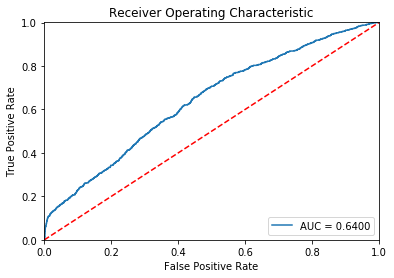

In [28]:
#y1_val.mean()
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)


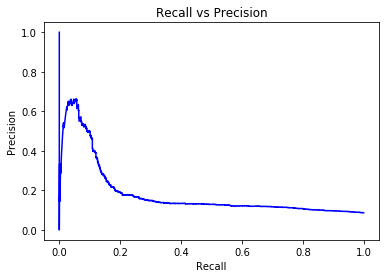

In [29]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


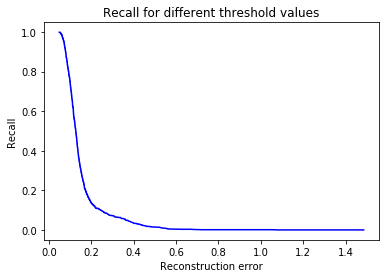

In [30]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [ ]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

In [33]:
mse_non = np.mean(np.power(non_promo - autoencoder.predict(non_promo), 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse_non,
                        'true_class': y1_val})
error_df.describe()

,reconstruction_error,true_class
count,40117.000000,10962.000000
mean,0.113250,0.085660
std,0.049200,0.279873
min,0.033844,0.000000
25%,0.082556,0.000000
50%,0.104228,0.000000
75%,0.135318,0.000000
max,1.489382,1.000000


In [34]:
mse_pro = np.mean(np.power(promo - autoencoder.predict(promo), 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse_pro,
                        'true_class': y1_val})
error_df.describe()

,reconstruction_error,true_class
count,3729.000000,10962.000000
mean,0.145894,0.085660
std,0.087895,0.279873
min,0.044177,0.000000
25%,0.098310,0.000000
50%,0.126560,0.000000
75%,0.154245,0.000000
max,1.005206,1.000000


In [36]:
test_errors = np.mean(np.power(X_test - autoencoder.predict(X_test), 2), axis=1)

In [38]:
ans = list(map(lambda x: 0 if x < 0.11 else 1, test_errors))

In [39]:
sum(ans)

11090

In [40]:
len(ans)

23490

In [ ]:
#Standardizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(one_hot_df) 

In [ ]:
#Pca
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
decom_mat=pca.fit_transform(scaled_values)

In [ ]:
X_train=decom_mat[0:54808]
X_test=decom_mat[54808:78298]
#X_train=one_hot_df.iloc[0:54808,:]
#X_test=one_hot_df.iloc[54808:78298,:]

In [ ]:
print X_train.shape
Y_train=np.array(train_data.is_promoted)


In [ ]:
#Model
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
x1_train, x1_val, y1_train, y1_val = train_test_split(X_train, Y_train,test_size = .15,random_state=12)

In [ ]:
#sm = SMOTE(random_state=12, ratio = 1)
#res_x, res_y = sm.fit_sample(X_train, Y_train)

In [ ]:
#x1_train.head()
#x1_train.dtypes

In [ ]:
#Dense layer
np.random.seed(0)
deep_model=Sequential()

In [ ]:
from keras.layers import Dense,Activation
deep_model.add(Dense(256,input_shape=(50,),activation='relu'))
deep_model.add(BatchNormalization())
deep_model.add(Dropout(0.25))
deep_model.add(Dense(128,input_shape=(64,),activation='relu'))
deep_model.add(BatchNormalization())
deep_model.add(Dropout(0.25))
deep_model.add(Dense(64,input_shape=(64,),activation='relu'))
deep_model.add(BatchNormalization())
deep_model.add(Dropout(0.25))
deep_model.add(Dense(32,activation='relu'))
deep_model.add(Dense(2 ,activation='softmax'))


In [ ]:
from keras.optimizers import SGD
#model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
deep_model.summary()
deep_model.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])

In [ ]:
#converting the y to be given as an input
from keras.utils import to_categorical
cat_y=to_categorical(Y_train, num_classes=2)

#x_scaled=sklearn.preprocessing.scale(x, axis=0, with_mean=True, with_std=True, copy=True)
x1_train, x1_test, y1_train, y1_test = train_test_split(X_train, cat_y, test_size=0.2, random_state=42)

In [ ]:
deep_model.fit(x1_train, y1_train,batch_size=30, validation_data=(x1_test,y1_test),epochs=15)


In [ ]:
prediction_deep = deep_model.predict_proba(X_test)[:,1]

In [ ]:
np.savetxt("/Users/s0c02nj/Desktop/WNS/probability_deep.csv",prediction_deep)

In [ ]:
! pip install impyute

In [ ]:
import impyute as impy


In [ ]:
#43846+946

In [ ]:
#Gaussian